In [2]:
from elasticsearch import Elasticsearch, exceptions as es_exceptions
from elasticsearch.helpers import scan
es = Elasticsearch([{'host':'uct2-es-door.mwt2.org', 'port':9200}])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
%matplotlib inline
plt.style.use('ggplot')

In [7]:
df=pd.read_pickle('undirected2_total.pkl')

df_mwt2=pd.read_pickle('mwt2_total.pkl')
df_mwt2

,cache,download_time,end1,end2,filename,host,sitename,start1,start2,start3,status,tries,xrdexit1,xrdexit2,xrdexit3,begin
timestamp,,,,,,,,,,,,,,,,
2016-07-12 11:39:39,root://data.ci-connect.net,30141,2016-07-12 11:39:39,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:39:09,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:39:08
2016-07-12 11:39:44,root://data.ci-connect.net,35186,2016-07-12 11:39:44,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:39:09,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:39:08
2016-07-12 11:46:09,root://data.ci-connect.net,29495,2016-07-12 11:46:09,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:45:40,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:45:39
2016-07-12 11:46:09,root://data.ci-connect.net,68604,2016-07-12 11:46:09,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:45:01,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:45:00
2016-07-12 11:46:12,root://data.ci-connect.net,25871,2016-07-12 11:46:12,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:45:46,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:45:46
2016-07-12 11:46:16,root://mwt2-stashcache.campuscluster.illinois.edu,19835,2016-07-12 11:44:56,2016-07-12 11:45:56,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UC,2016-07-12 11:43:56,2016-07-12 11:44:56,2016-07-12 11:45:56,Trunk Success,3,137,137,0,2016-07-12 11:45:56
2016-07-12 11:46:23,root://data.ci-connect.net,33110,2016-07-12 11:46:23,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:45:50,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:45:49
2016-07-12 11:46:38,root://mwt2-stashcache.campuscluster.illinois.edu,19362,2016-07-12 11:45:18,2016-07-12 11:46:18,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UC,2016-07-12 11:44:18,2016-07-12 11:45:18,2016-07-12 11:46:18,Trunk Success,3,137,137,0,2016-07-12 11:46:18
2016-07-12 11:46:38,root://data.ci-connect.net,39947,2016-07-12 11:46:38,1969-12-31 18:00:00,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,MWT2_CE_UIUC,2016-07-12 11:45:58,1969-12-31 18:00:00,1969-12-31 18:00:00,Success,1,0,-1,-1,2016-07-12 11:45:58


In [5]:
length=df.shape[0]


caches=[]

for i in range(length):
    if df['tries'].iloc[i]=="3":
        caches.append(df.iloc[i])
        
caches = pd.DataFrame(caches)
#caches=caches.set_index(['timestamp']) 
caches#caches=caches.set_index(['timestamp']) 
jobs = pd.concat([pd.Series(1, df.begin), pd.Series(-1, df.index)]).resample('1Min', how='sum').cumsum()
index=jobs.index


cache_timeout=pd.DataFrame(columns=['index', 'BNL Timeout'])
cache_timeout['index']=index
cache_timeout['BNL Timeout']=0
length2=cache_timeout.shape[0]

for i in range(length2):
    for j in range(length):
            if caches['end1'].iloc[i].replace(second=0, microsecond=0)==cache_timeout['index'].iloc[i].replace(second=0, microsecond=0):
                cache_timeout['BNL Timeout']+=1 
            if caches['end2'].iloc[i].replace(second=0, microsecond=0)==cache_timeout['index'].iloc[i].replace(second=0, microsecond=0):
                cache_timeout['BNL Timeout']+=1 


/home/ivukotic/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


In [6]:
caches

,cache,download_time,end1,end2,filename,host,sitename,start1,start2,start3,status,tries,xrdexit1,xrdexit2,xrdexit3,begin
2016-07-11 15:11:04,root://osgxroot.usatlas.bnl.gov,101756,2016-07-11 15:05:22,2016-07-11 15:09:22,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:04:22,2016-07-11 15:05:22,2016-07-11 15:09:22,Trunk Success,3,137,137,0,2016-07-11 15:09:22
2016-07-11 15:11:11,root://osgxroot.usatlas.bnl.gov,107530,2016-07-11 15:05:23,2016-07-11 15:09:24,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:04:23,2016-07-11 15:05:23,2016-07-11 15:09:24,Trunk Success,3,137,137,0,2016-07-11 15:09:23
2016-07-11 15:11:17,root://osgxroot.usatlas.bnl.gov,114359,2016-07-11 15:05:23,2016-07-11 15:09:23,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:04:23,2016-07-11 15:05:23,2016-07-11 15:09:23,Trunk Success,3,137,137,0,2016-07-11 15:09:22
2016-07-11 15:16:21,root://osgxroot.usatlas.bnl.gov,174927,2016-07-11 15:05:26,2016-07-11 15:13:26,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,BNL_ATLAS_2,2016-07-11 15:04:25,2016-07-11 15:05:26,2016-07-11 15:13:26,Trunk Success,3,137,137,0,2016-07-11 15:13:26
2016-07-11 15:16:30,root://osgxroot.usatlas.bnl.gov,141807,2016-07-11 15:10:08,2016-07-11 15:14:08,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,BNL_ATLAS_2,2016-07-11 15:06:08,2016-07-11 15:10:08,2016-07-11 15:14:08,Trunk Success,3,137,137,0,2016-07-11 15:14:08
2016-07-11 15:15:43,root://osgxroot.usatlas.bnl.gov,199339,2016-07-11 15:09:23,2016-07-11 15:12:23,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:04:23,2016-07-11 15:09:23,2016-07-11 15:12:23,Trunk Success,3,137,137,0,2016-07-11 15:12:23
2016-07-11 15:15:52,root://osgxroot.usatlas.bnl.gov,148222,2016-07-11 15:10:24,2016-07-11 15:13:24,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,BNL_ATLAS_2,2016-07-11 15:04:24,2016-07-11 15:10:24,2016-07-11 15:13:24,Trunk Success,3,137,137,0,2016-07-11 15:13:23
2016-07-11 15:16:04,root://osgxroot.usatlas.bnl.gov,145110,2016-07-11 15:09:39,2016-07-11 15:13:39,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:08:39,2016-07-11 15:09:39,2016-07-11 15:13:39,Trunk Success,3,137,137,0,2016-07-11 15:13:38
2016-07-11 15:15:23,root://osgxroot.usatlas.bnl.gov,240725,2016-07-11 15:05:22,2016-07-11 15:11:22,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,NET2,2016-07-11 15:04:22,2016-07-11 15:05:22,2016-07-11 15:11:22,Trunk Success,3,137,137,0,2016-07-11 15:11:22
2016-07-11 15:17:21,root://osgxroot.usatlas.bnl.gov,163236,2016-07-11 15:13:38,2016-07-11 15:14:38,user/taburaad/public/2gb_file.tar,root://data.ci-connect.net,BNL_ATLAS_1,2016-07-11 15:08:38,2016-07-11 15:13:38,2016-07-11 15:14:38,Trunk Success,3,137,137,0,2016-07-11 15:14:37


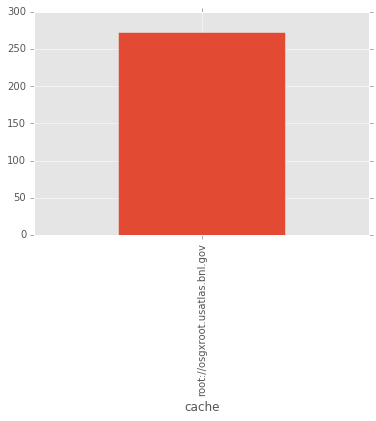

In [12]:
caches=pd.DataFrame(caches)
caches.groupby(['cache'])['cache'].count().plot.bar()

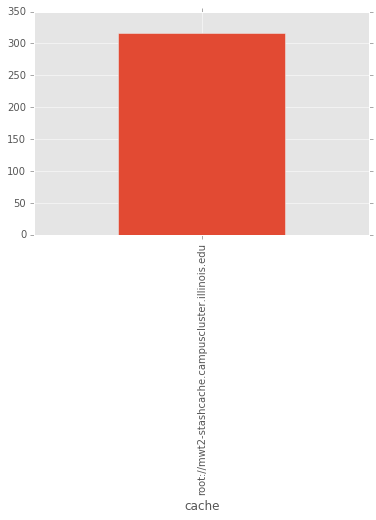

In [10]:
length_m=df_mwt2.shape[0]
caches2=[]
for i in range(length_m):
    if df_mwt2['tries'].iloc[i]=="3":
        caches2.append(df_mwt2.iloc[i])
        
caches2 = pd.DataFrame(caches2)
caches2
caches2.groupby(['cache'])['cache'].count().plot.bar()